In [1]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


Fetch Images count from Folders

In [2]:
count = 0 
dirs = os.listdir('Images/')  
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

daisy-20250126T131344Z-001 Folder has 1 Images
dandelion-20250126T131344Z-001 Folder has 1 Images
rose-20250126T131347Z-001 Folder has 1 Images
sunflower-20250126T131350Z-001 Folder has 1 Images
tulip-20250126T131358Z-001 Folder has 1 Images
Images Folder has 5 Images


In [3]:
#Load Images into Arrays as Dataset

In [4]:
base_dir = 'Images/'
img_size = 180
batch = 32

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [6]:
flower_names = train_ds.class_names
flower_names

['daisy-20250126T131344Z-001',
 'dandelion-20250126T131344Z-001',
 'rose-20250126T131347Z-001',
 'sunflower-20250126T131350Z-001',
 'tulip-20250126T131358Z-001']

In [7]:
import matplotlib.pyplot as plt

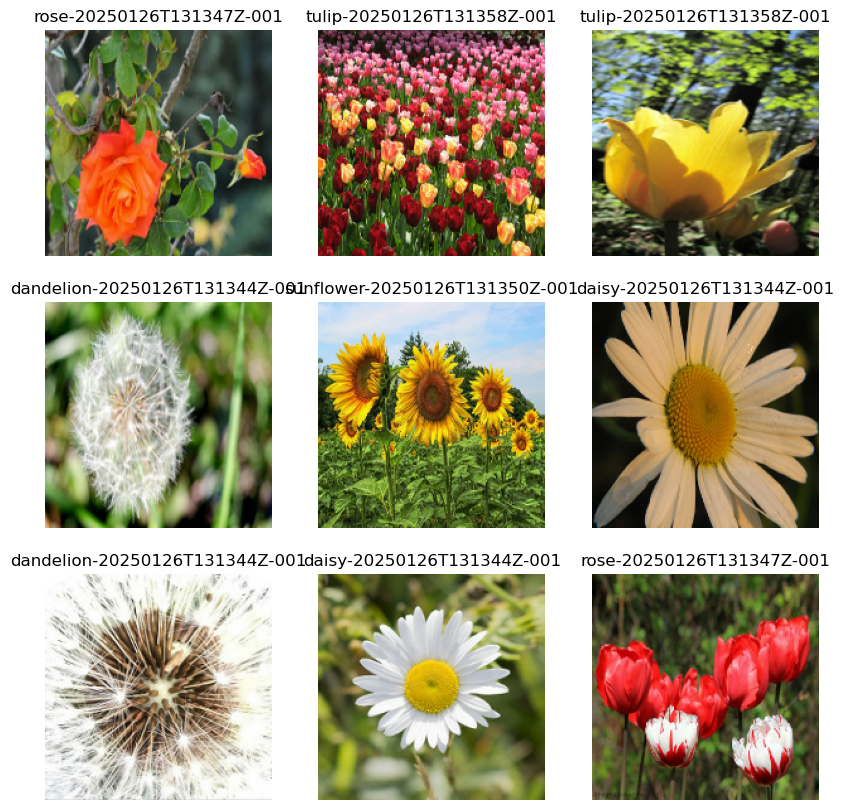

In [8]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [11]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [12]:
#Data Augmentation

In [13]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

C:\Users\ANKIT\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


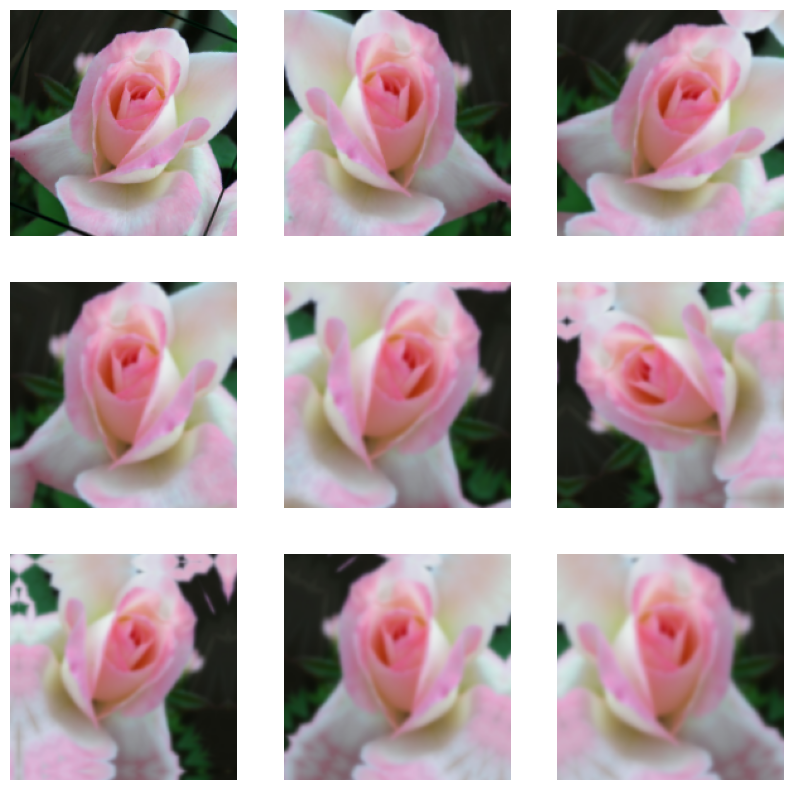

In [14]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [15]:
#MOdel Creation

In [16]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 25s 234ms/step - accuracy: 0.7771 - loss: 0.5641 - val_accuracy: 0.7254 - val_loss: 0.7356
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 26s 242ms/step - accuracy: 0.8126 - loss: 0.5159 - val_accuracy: 0.7161 - val_loss: 0.7880
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 24s 223ms/step - accuracy: 0.8037 - loss: 0.5271 - val_accuracy: 0.7173 - val_loss: 0.8693
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 214ms/step - accuracy: 0.8100 - loss: 0.5089 - val_accuracy: 0.7196 - val_loss: 0.7952
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 24s 223ms/step - accuracy: 0.8289 - loss: 0.4685 - val_accuracy: 0.7370 - val_loss: 0.8507
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 33s 303ms/step - accuracy: 0.8302 - loss: 0.4465 - val_accuracy: 0.7486 - val_loss: 0.7633
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 27s 246ms/step - accuracy: 0.8391 - loss: 0.4341 - val_accuracy: 0.7428 - val_loss: 0.7921
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 28s 260ms/step - accuracy: 0.8537 - loss: 0

In [25]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [26]:
classify_images('Sample/rose.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


'The Image belongs to rose-20250126T131347Z-001 with a score of 96.34004235267639'